# ***Rishika Ahluwalia***

#Task 6: Prediction using Decision Tree Algorithm

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no null values, so we'll proceed further

In [8]:
df.shape

(150, 6)

In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [11]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [15]:
#since species column is of type object, we will convert it into integers using LabelEncoder
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()
df.iloc[:,5]=labelencoder.fit_transform(df.iloc[:,5].values)

In [16]:
df.iloc[:,5]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [17]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [18]:
y=df.iloc[:,5].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
x=df.iloc[:,1:5]
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
#splitting the data for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.25, random_state=0)

In [26]:
#scale the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
x_train

array([[ 1.54399532e-02, -1.19254753e-01,  2.25126850e-01,
         3.56381749e-01],
       [-9.98450310e-02, -1.04039491e+00,  1.13559562e-01,
        -2.86480506e-02],
       [ 1.05300481e+00, -1.19254753e-01,  9.50314227e-01,
         1.12644135e+00],
       [-1.36797986e+00,  3.41315328e-01, -1.39259884e+00,
        -1.31208072e+00],
       [ 1.16828980e+00,  1.11030287e-01,  7.27179649e-01,
         1.38312788e+00],
       [-1.02212490e+00,  1.03217045e+00, -1.22524790e+00,
        -7.98707650e-01],
       [-5.60984968e-01,  1.49274053e+00, -1.28103155e+00,
        -1.31208072e+00],
       [-1.02212490e+00, -2.42210516e+00, -1.65358660e-01,
        -2.85334584e-01],
       [ 7.07149859e-01, -1.19254753e-01,  9.50314227e-01,
         7.41411549e-01],
       [ 9.37719827e-01,  5.71600368e-01,  1.06188152e+00,
         1.63981441e+00],
       [ 1.30724937e-01, -1.96153508e+00,  6.71396005e-01,
         3.56381749e-01],
       [ 9.37719827e-01, -1.27067995e+00,  1.11766516e+00,
      

In [28]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier(criterion='entropy',random_state=0)
tree.fit(x_train,y_train)
yhat= tree.predict(x_test)
yhat

array([2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [30]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test,yhat)
accuracy

0.9736842105263158

In [38]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y
 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


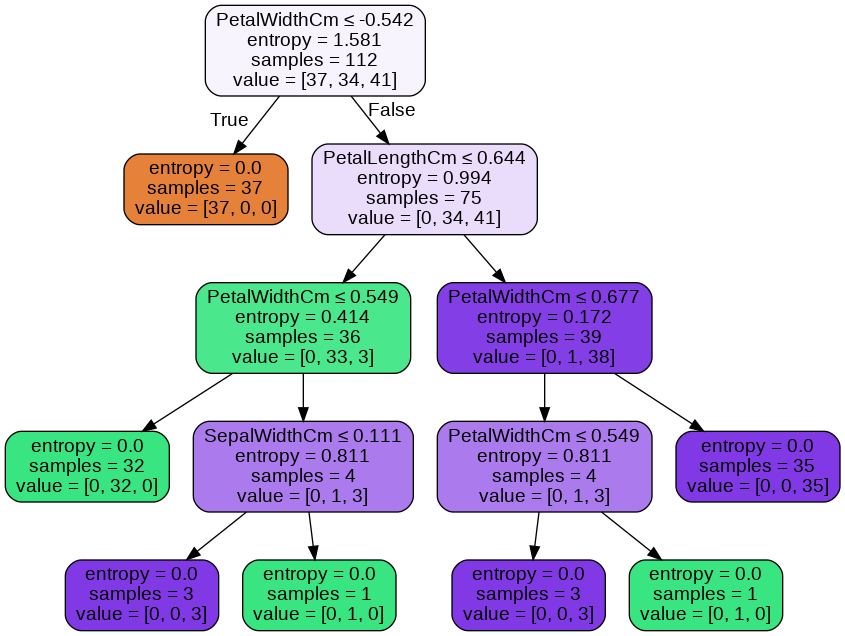

In [46]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=df.columns[1:5],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())